In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
from bokeh.io import output_notebook, show, save
from bokeh.models import CategoricalColorMapper
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Range1d, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6, Spectral10, Spectral4
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import cumsum
from math import pi
from bokeh.palettes import Category20c
import plotly.graph_objects as go
import plotly.express as px
import warnings
from bokeh.models.glyphs import Text
from bokeh.transform import dodge
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Range1d
from bokeh.transform import factor_cmap
from bokeh.io.export import export_png
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
output_notebook()


Loading BokehJS ...

# Demographics Analysis

In [86]:
pd.set_option('display.max_columns', None)

In [87]:
path  = "../data/raw_data1.xlsx"

In [5]:

table2_dem = pd.read_excel(path,sheet_name="Table 2", usecols=range(0, 8))


In [6]:
table2_dem.info

<bound method DataFrame.info of        Demographics Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          username        age        sex        bmi       psqi       race   
1      predict10091  53.645448          F  25.530409          5      White   
2      predict10092  53.645448          F   24.27256          8      White   
3      predict10181  43.110198          F  21.620041          3      White   
4      predict10182   42.96783          F  22.728657          2      White   
...             ...        ...        ...        ...        ...        ...   
89531           NaN        NaN        NaN        NaN        NaN        NaN   
89532           NaN        NaN        NaN        NaN        NaN        NaN   
89533           NaN        NaN        NaN        NaN        NaN        NaN   
89534           NaN        NaN        NaN        NaN        NaN        NaN   
89535           NaN        NaN        NaN        NaN        NaN        NaN   

      Unnamed: 6 Unnamed: 7  
0

In [7]:
table2_dem.head(6)

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,username,age,sex,bmi,psqi,race,zygosity,country
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
5,predict10332,62.140999,F,22.37467,4,White,MZ,GB


In [8]:
table2_dem.tail(6)

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
89530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_dem = table2_dem.dropna(how='all') #removes the NAN value in all the columns 
df_dem

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,username,age,sex,bmi,psqi,race,zygosity,country
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
...,...,...,...,...,...,...,...,...
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [10]:
df_dem.tail(6)

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
828,predict998961,58.414784,M,27.522406,NaN,White,NT,US
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US
833,predict9991,55.82204,F,26.113602,5,White,MZ,GB


In [11]:
df_dem = df_dem.drop(index=0)

In [12]:
df_dem

,Demographics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
5,predict10332,62.140999,F,22.37467,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [13]:
'''change the column name.'''

new_col = ["username", "age", "sex", "bmi", "psqi", "race", "zygosity","country"]  
column_map = {df_dem.columns[i]: new_col[i] for i in range(len(df_dem.columns))}
df_dem= df_dem.rename(columns=column_map)

In [14]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
1,predict10091,53.645448,F,25.530409,5,White,MZ,GB
2,predict10092,53.645448,F,24.27256,8,White,MZ,GB
3,predict10181,43.110198,F,21.620041,3,White,MZ,GB
4,predict10182,42.96783,F,22.728657,2,White,MZ,GB
5,predict10332,62.140999,F,22.37467,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
829,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
830,predict998981,64.342231,M,30.371478,NaN,White,NT,US
831,predict998991,30.844627,F,22.920658,NaN,White,NT,US
832,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [15]:
df_dem.reset_index(drop=True, inplace=True)
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53.645448,F,25.530409,5,White,MZ,GB
1,predict10092,53.645448,F,24.27256,8,White,MZ,GB
2,predict10181,43.110198,F,21.620041,3,White,MZ,GB
3,predict10182,42.96783,F,22.728657,2,White,MZ,GB
4,predict10332,62.140999,F,22.37467,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59.427789,F,25.607152,NaN,Other or Mixed,NT,US
829,predict998981,64.342231,M,30.371478,NaN,White,NT,US
830,predict998991,30.844627,F,22.920658,NaN,White,NT,US
831,predict999001,42.184805,F,21.94219,NaN,African,NT,US


In [16]:
'''Check the null values.'''

num_nans = df_dem["psqi"].isna().sum()
num_nans

106

In [17]:
df_dem['age'] = df_dem['age'].astype(int)


In [18]:
df_dem['bmi'] = df_dem['bmi'].apply(lambda x:round(x,2))

In [19]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53,F,25.53,5,White,MZ,GB
1,predict10092,53,F,24.27,8,White,MZ,GB
2,predict10181,43,F,21.62,3,White,MZ,GB
3,predict10182,42,F,22.73,2,White,MZ,GB
4,predict10332,62,F,22.37,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64,M,30.37,NaN,White,NT,US
830,predict998991,30,F,22.92,NaN,White,NT,US
831,predict999001,42,F,21.94,NaN,African,NT,US


In [20]:
nan_count = df_dem['psqi'].isna().sum()
nan_count


106

In [21]:
nan_count = df_dem['age'].isna().sum()
nan_count

0

In [22]:
nan_count = df_dem['sex'].isna().sum()
nan_count

0

In [23]:
nan_count = df_dem['bmi'].isna().sum()
nan_count

0

In [24]:
nan_count = df_dem['race'].isna().sum()
nan_count

30

In [25]:
nan_count = df_dem['zygosity'].isna().sum()
nan_count

0

In [26]:
nan_count = df_dem['country'].isna().sum()
nan_count

0

In [27]:
df_dem["age"].min()

18

In [28]:
df_dem["age"].max()

65

In [29]:


age_ranges = ['10-19','20-29', '30-39', '40-49', '50-59', '60-69']
age_counts = []
for age_range in age_ranges:
    lower, upper = map(int, age_range.split('-'))
    count = len(df_dem[(df_dem['age'] >= lower) & (df_dem['age'] <= upper)])
    age_counts.append(count)
colors = ['#DAF7A6', '#9ACD32', '#228B22', '#FF6666', '#CC0000', '#8B0000']
source = ColumnDataSource(data=dict(age_ranges=age_ranges, age_counts=age_counts))
p1 = figure(x_range=FactorRange(factors=age_ranges), y_range=Range1d(0, max(age_counts) + 5), 
           plot_height=500, plot_width=1000, title="Age Group Distribution")
p1.vbar(x='age_ranges', top='age_counts', width=0.9, source=source, line_color='white',
       fill_color=factor_cmap('age_ranges', palette=colors, factors=age_ranges),
       legend_field='age_ranges')  
p1.xaxis.axis_label = "Age Group"
p1.yaxis.axis_label = "Number of People"
p1.title.text_font_size = "20pt"
p1.xaxis.axis_label_text_font_size = "16pt"
p1.xaxis.major_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "16pt"
p1.yaxis.major_label_text_font_size = "12pt"

p1.legend.title = "Age Groups"
p1.legend.label_text_font_size = "10pt"
p1.legend.location = "top_right"
p1.legend.border_line_color = "black"
p1.add_layout(p1.legend[0], 'right')
show(p1)

# export_png(p, filename="age_groups.png", height=1200, width=2400)


In [30]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53,F,25.53,5,White,MZ,GB
1,predict10092,53,F,24.27,8,White,MZ,GB
2,predict10181,43,F,21.62,3,White,MZ,GB
3,predict10182,42,F,22.73,2,White,MZ,GB
4,predict10332,62,F,22.37,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64,M,30.37,NaN,White,NT,US
830,predict998991,30,F,22.92,NaN,White,NT,US
831,predict999001,42,F,21.94,NaN,African,NT,US


In [31]:
gender_counts = df_dem['sex'].value_counts()
gender_list = gender_counts.index.tolist()
count_list = gender_counts.tolist()
colors = ['#3182bd', '#e6550d']  
color_mapper = CategoricalColorMapper(factors=gender_list, palette=colors)
source = ColumnDataSource(data=dict(gender=gender_list, count=count_list, color=colors))
p2 = figure(title='Gender Distribution', x_range=gender_list, 
            plot_height=400, plot_width=800, 
            x_axis_label='Gender', y_axis_label='Count')
p2.vbar(x='gender', top='count', width=0.8, source=source, color='color', legend_field='gender')

p2.title.text_font_size = "20pt"
p2.xaxis.axis_label_text_font_size = "16pt"
p2.xaxis.major_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "16pt"
p2.yaxis.major_label_text_font_size = "12pt"

p2.legend.title = "Gender"
p2.legend.label_text_font_size = "12pt"
p2.legend.location = "top_right"
p2.legend.border_line_color = "black"


show(p2)



In [32]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53,F,25.53,5,White,MZ,GB
1,predict10092,53,F,24.27,8,White,MZ,GB
2,predict10181,43,F,21.62,3,White,MZ,GB
3,predict10182,42,F,22.73,2,White,MZ,GB
4,predict10332,62,F,22.37,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64,M,30.37,NaN,White,NT,US
830,predict998991,30,F,22.92,NaN,White,NT,US
831,predict999001,42,F,21.94,NaN,African,NT,US


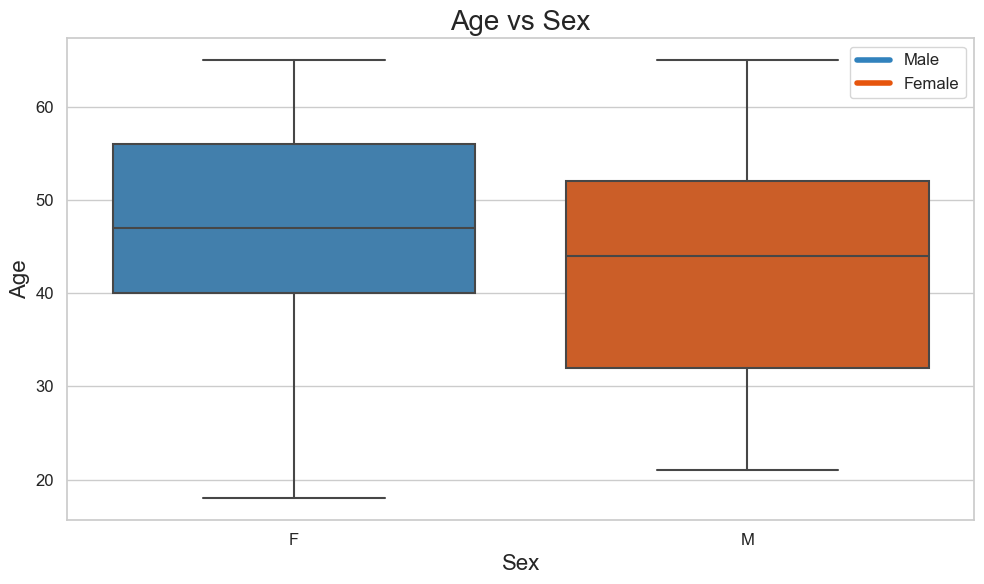

In [33]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
box = sns.boxplot(x='sex', y='age', data=df_dem, palette=['#3182bd', '#e6550d'])
handles = [plt.Line2D([0], [0], color='#3182bd', lw=4, label='Male'),
           plt.Line2D([0], [0], color='#e6550d', lw=4, label='Female')]
plt.legend(handles=handles, loc="upper right", fontsize=12, title_fontsize=14)
plt.title('Age vs Sex', fontsize=20)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("../plot_new/f3.png", dpi=600, bbox_inches="tight")
plt.show()


In [34]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53,F,25.53,5,White,MZ,GB
1,predict10092,53,F,24.27,8,White,MZ,GB
2,predict10181,43,F,21.62,3,White,MZ,GB
3,predict10182,42,F,22.73,2,White,MZ,GB
4,predict10332,62,F,22.37,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64,M,30.37,NaN,White,NT,US
830,predict998991,30,F,22.92,NaN,White,NT,US
831,predict999001,42,F,21.94,NaN,African,NT,US


In [35]:

bins = [10, 20, 30, 40, 50, 60, 70]
age_ranges = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
age_bins = pd.cut(df_dem['age'], bins=bins, labels=age_ranges)
colors = ['#DAF7A6', '#9ACD32', '#228B22', '#FF6666', '#CC0000', '#8B0000']
color_mapper = CategoricalColorMapper(factors=age_ranges, palette=colors)
source = ColumnDataSource(data=dict(age=df_dem['age'], bmi=df_dem['bmi'], age_bins=age_bins))
p3 = figure(title='Age vs BMI', x_axis_label='Age', y_axis_label='BMI',
            plot_width=1000, plot_height=500)
p3.circle('age', 'bmi', size=10, source=source,
          color=factor_cmap('age_bins', palette=color_mapper.palette, factors=color_mapper.factors),
          legend_field='age_bins')

p3.title.text_font_size = "20pt"
p3.xaxis.axis_label_text_font_size = "16pt"
p3.xaxis.major_label_text_font_size = "12pt"
p3.yaxis.axis_label_text_font_size = "16pt"
p3.yaxis.major_label_text_font_size = "12pt"
p3.legend.title = "Age Groups"
p3.legend.label_text_font_size = "12pt"
p3.legend.title_text_font_size = "14pt"
p3.legend.location = "center_right"  
p3.legend.border_line_color = "black"
p3.add_layout(p3.legend[0], 'right')  

show(p3)

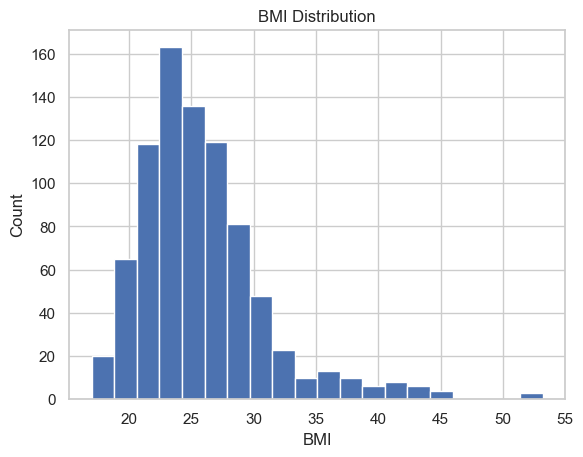

In [36]:

# Histogram of BMI
plt.hist(x='bmi', data=df_dem, bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [37]:
bmi_ranges = [(0, 18.5), (18.5, 25), (25, 30), (30, df_dem['bmi'].max() + 1)]
bmi_categories = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']
colors = ['#90EE90', '#008000', '#FF6666', '#CC0000']
bmi_counts = {'Underweight': 0, 'Healthy Weight': 0, 'Overweight': 0, 'Obese': 0}

for i in range(len(bmi_ranges)):
    lower_bound = bmi_ranges[i][0]
    upper_bound = bmi_ranges[i][1]
    category = bmi_categories[i]
    count = ((df_dem['bmi'] >= lower_bound) & (df_dem['bmi'] < upper_bound)).sum()
    bmi_counts[category] = count
source = ColumnDataSource(data={
    'bmi_categories': bmi_categories,
    'bmi_counts': [bmi_counts[cat] for cat in bmi_categories],
    'colors': colors
})

p4= figure(x_range=bmi_categories, plot_height=500, plot_width=1000,
           title='BMI Distribution', tools='pan,wheel_zoom,reset,save')
p4.vbar(x='bmi_categories', top='bmi_counts', width=0.9, source=source,
       fill_color='colors', line_color='white', legend_field='bmi_categories')
p4.title.text_font_size = "20pt"
p4.xaxis.axis_label = 'BMI Categories'
p4.yaxis.axis_label = 'Number of People'
p4.xaxis.axis_label_text_font_size = "16pt"
p4.yaxis.axis_label_text_font_size = "16pt"
p4.xaxis.major_label_text_font_size = "12pt"
p4.yaxis.major_label_text_font_size = "12pt"
p4.legend.title = "BMI Categories"
p4.legend.label_text_font_size = "12pt"
p4.legend.title_text_font_size = "14pt"
p4.legend.location = "top_right"
p4.legend.border_line_color = "black"

# Show the plot
show(p4)

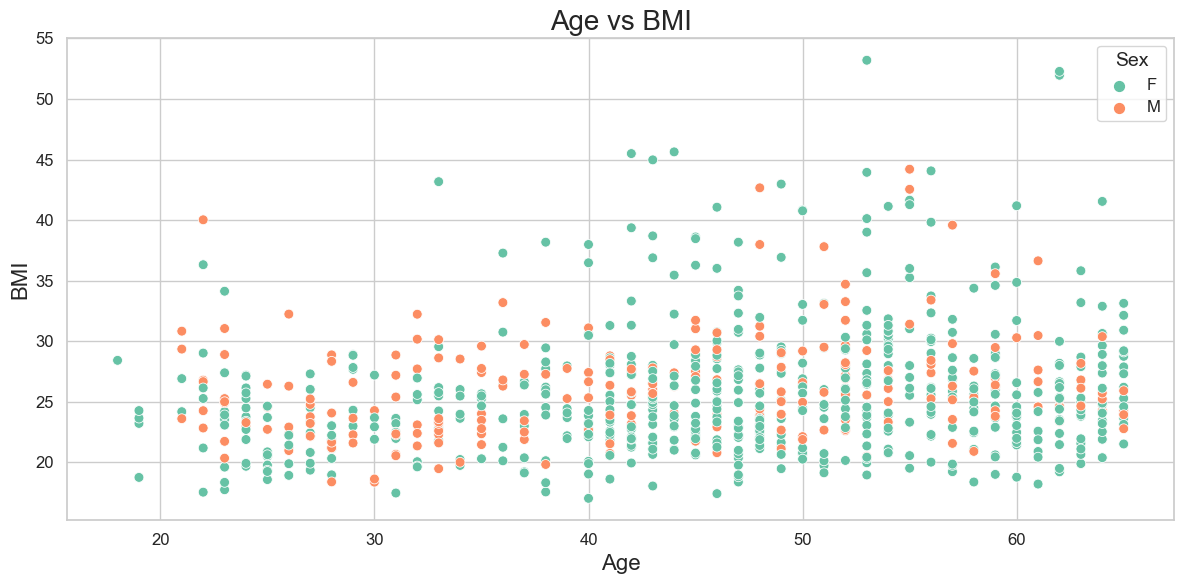

In [38]:

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
scatter_plot = sns.scatterplot(
    data=df_dem, x="age", y="bmi", hue="sex", size="sex", sizes=(50, 50), palette="Set2"
)
legend = scatter_plot.legend_
legend.set_title("Sex")
legend.get_title().set_fontsize(14)  
for text in legend.get_texts():
    text.set_fontsize(12)  
plt.title("Age vs BMI", fontsize=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("BMI", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("../plot_new/f6.png", dpi=600, bbox_inches="tight")
plt.show()

In [39]:
df_dem

,username,age,sex,bmi,psqi,race,zygosity,country
0,predict10091,53,F,25.53,5,White,MZ,GB
1,predict10092,53,F,24.27,8,White,MZ,GB
2,predict10181,43,F,21.62,3,White,MZ,GB
3,predict10182,42,F,22.73,2,White,MZ,GB
4,predict10332,62,F,22.37,4,White,MZ,GB
...,...,...,...,...,...,...,...,...
828,predict998971,59,F,25.61,NaN,Other or Mixed,NT,US
829,predict998981,64,M,30.37,NaN,White,NT,US
830,predict998991,30,F,22.92,NaN,White,NT,US
831,predict999001,42,F,21.94,NaN,African,NT,US


In [40]:
df_dem_copy = df_dem.copy()

In [41]:
# df_dem_copy

In [42]:
country_counts = df_dem_copy.groupby('country').size().reset_index(name='counts')
country_counts['angle'] = country_counts['counts'] / country_counts['counts'].sum() * 2 * pi
country_counts['color'] = Spectral6[:len(country_counts)]  
fig = go.Figure(data=[go.Pie(labels=country_counts['country'],
                             values=country_counts['counts'],
                             hovertemplate='%{label}: %{value}',
                             textinfo='value+percent',
                             textposition='inside')])
fig.update_traces(marker=dict(colors=country_counts['color']), hole=.4)
fig.update_layout(
    title=dict(
        text='People Percentage by Country',
        font=dict(size=20)  
    ),
    showlegend=True,
    legend=dict(
        title=dict(text="Countries", font=dict(size=14)),  
        font=dict(size=12), 
        orientation="v",
        x=1,  
        xanchor="left",
        yanchor="middle"
    ),
    margin=dict(l=20, r=20, t=50, b=20),  
    height=500,  
    width=500,   
    font=dict(
        size=12 
    )
)

# Show the plot
fig.show()






In [43]:
df_dem_copy2 = df_dem.copy()

In [44]:
country_counts = df_dem_copy2.groupby('race').size().reset_index(name='counts')
source = ColumnDataSource(country_counts)
races = source.data['race'].tolist()
p = figure(x_range=FactorRange(factors=races), plot_height=500, plot_width=1000,
           title='Number of People by Race')
colors = factor_cmap('race', palette=Spectral10, factors=races)
p.vbar(x='race', top='counts', source=source, width=0.9, line_color='white', fill_color=colors, legend_field='race')

p.xaxis.axis_label = 'Race'
p.yaxis.axis_label = 'Number of People'
p.title.text_font_size = "20pt"
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"
p.legend.title = "Race"
p.legend.label_text_font_size = "12pt"
p.legend.title_text_font_size = "14pt"
p.legend.location = "top_left"
p.legend.border_line_color = "black"
# p.add_layout(p.legend[0], 'right')  
show(p)

In [45]:
df_dem_copy3 = df_dem.copy()

In [46]:
zygosity_counts = df_dem_copy3.groupby('zygosity').size().reset_index(name='counts')
zygosity_counts['angle'] = zygosity_counts['counts'] / zygosity_counts['counts'].sum() * 2 * pi
zygosity_counts['color'] = Spectral10[:len(zygosity_counts)]

fig = go.Figure(data=[go.Pie(labels=zygosity_counts['zygosity'],
                             values=zygosity_counts['counts'],
                             hovertemplate='%{label}: %{value}',
                             textinfo='value+percent',
                             textposition='inside')])
fig.update_traces(marker=dict(colors=zygosity_counts['color']), hole=.4)
fig.update_layout(
    title=dict(
        text='Zygosity Distribution',
        font=dict(size=20) 
    ),
    showlegend=True,
    legend=dict(
        title=dict(text="Zygosity Types", font=dict(size=14)),  
        font=dict(size=12),  
        orientation="v", 
        x=1, 
        y=0.5,
        xanchor="left",
        yanchor="middle"
    ),
    margin=dict(l=20, r=20, t=50, b=20),  
    height=500,  
    width=500,  
    font=dict(
        size=12  
    )
)

fig.show()



In [47]:
zygosity_counts

,zygosity,counts,angle,color
0,DZ,134,1.010740,#5e4fa2
1,MZ,340,2.564565,#3288bd
2,NT,359,2.707879,#66c2a5


In [51]:
psqi_ranges = [(0, 4), (4, 11), (11, 21)]
psqi_categories = ['Excellent Sleep Quality', 'Good Sleep Quality', 'Poor Sleep Quality']

colors = ['#008000', '#FF6666', '#CC0000']
psqi_counts = {'Excellent Sleep Quality': 0, 'Good Sleep Quality': 0, 'Poor Sleep Quality': 0}

for i in range(len(psqi_ranges)):
    lower_bound = psqi_ranges[i][0]
    upper_bound = psqi_ranges[i][1]
    category = psqi_categories[i]
    count = ((df_dem['psqi'] >= lower_bound) & (df_dem['psqi'] < upper_bound)).sum()
    psqi_counts[category] = count

source = ColumnDataSource(data={
    'psqi_categories': psqi_categories,
    'psqi_counts': [psqi_counts[cat] for cat in psqi_categories],
    'colors': colors
})

p = figure(x_range=psqi_categories, plot_height=500, plot_width=800,
           title='Pittsburgh Sleep Quality Index Distribution', tools='pan,wheel_zoom,reset, save')

p.vbar(x='psqi_categories', top='psqi_counts', width=0.9, source=source,
       fill_color='colors', line_color='white', legend_field='psqi_categories')

p.xaxis.axis_label = 'PSQI Categories'
p.yaxis.axis_label = 'Number of People'

p.title.text_font_size = "20pt"
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"

p.legend.title = "PSQI Categories"
p.legend.label_text_font_size = "12pt"
p.legend.title_text_font_size = "14pt"
p.legend.location = "top_right"
p.legend.border_line_color = "black"
# p.add_layout(p.legend[0], 'right') 
# Show the plot
show(p)



In [52]:
# df_psqi = pd.read_excel(path, sheet_name='Table 2',usecols=range(0, 8))
# df_psqi = df_psqi.drop(index=0)
# new_col = ["username", "age", "sex", "bmi", "psqi", "race", "zygosity","country"]  
# column_map = {df_psqi .columns[i]: new_col[i] for i in range(len(df_psqi.columns))}
# df_psqi  = df_psqi.rename(columns=column_map)
# df_psqi = df_psqi.dropna(how='all')
# df_psqi = df_psqi.dropna(subset=['psqi'])
# df_psqi['psqi'] = df_psqi['psqi'].astype(int)

In [53]:

# # Define the bin ranges and labels
# bin_ranges = [0, 4, 21]
# bin_labels = ['Excellent', 'Very Poor']

# # Cut the PSQI scores into bins and assign labels
# df_psqi['psqi_bin'] = pd.cut(df_psqi['psqi'], bins=bin_ranges, labels=bin_labels)

# # Calculate the count of each bin
# bin_counts = df_psqi['psqi_bin'].value_counts()

# # Create a bar plot using seaborn
# sns.set(style='whitegrid')
# ax = sns.barplot(x=bin_counts.index, y=bin_counts, palette='Blues')

# # Set the x-axis labels using the bin_labels
# ax.set_xticklabels(bin_labels)

# # Set the plot title and axis labels
# ax.set(title='PSQI Scores', xlabel='PSQI Category', ylabel='Count')

# # Show the plot
# plt.show()

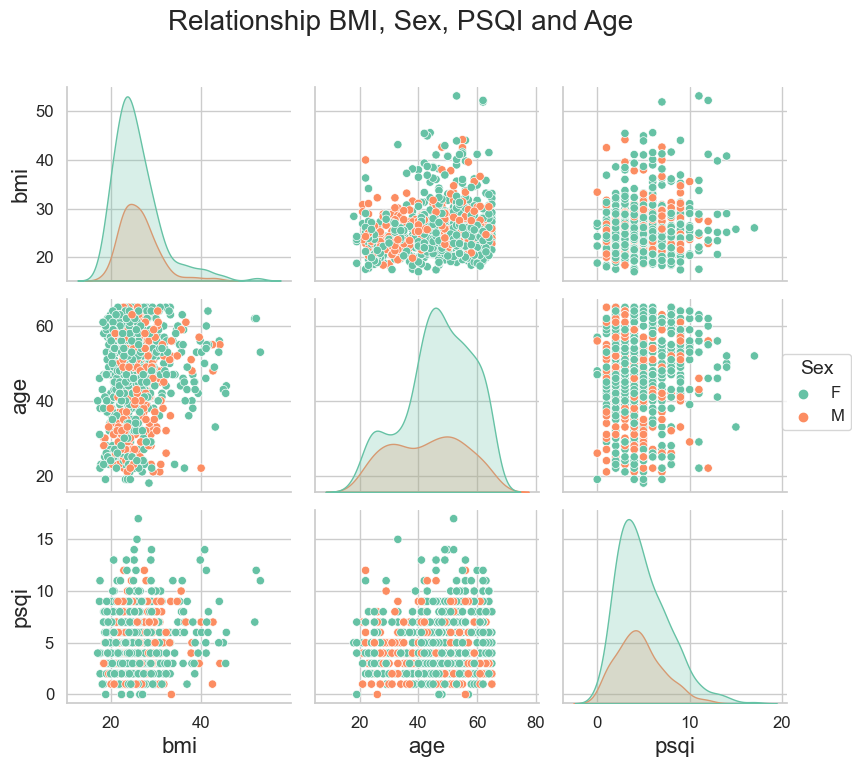

In [56]:
'''A pairplot using seaborn to visualize the relationship between BMI, age, and PSQI scores, 
with the data separated by sex.'''

sns.set(style="whitegrid")  
pairplot = sns.pairplot(data=df_dem, vars=['bmi', 'age', 'psqi'], hue='sex', palette="Set2")

pairplot.fig.suptitle('Relationship BMI, Sex, PSQI and Age', fontsize=20, y=1.02)  
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  
    ax.tick_params(axis='both', labelsize=12) 


pairplot._legend.set_title("Sex")
pairplot._legend.get_title().set_fontsize(14)  
for text in pairplot._legend.texts:
    text.set_fontsize(12) 
pairplot._legend.set_bbox_to_anchor((1.05, 0.5))  
pairplot._legend.set_frame_on(True)  
plt.tight_layout()
pairplot.fig.savefig("../plot_new/f11.png", dpi=600, bbox_inches="tight")
plt.show()

# Sleep Analysis

In [149]:
table2_sleep = pd.read_excel(path,sheet_name="Table 2", usecols=range(9, 14))

In [150]:
table2_sleep.info

<bound method DataFrame.info of               Sleep Unnamed: 10 Unnamed: 11    Unnamed: 12     Unnamed: 13
0          username         spt          se  sleeponset_hr  sleepoffset_hr
1      predict10091    8.497222     0.89915          -1.35            7.15
2      predict10091    9.959722    0.921071          -0.65             9.3
3      predict10091    8.426389    0.859733       0.916667        9.333333
4      predict10091    9.122222    0.953715           -1.1        8.016667
...             ...         ...         ...            ...             ...
89531           NaN         NaN         NaN            NaN             NaN
89532           NaN         NaN         NaN            NaN             NaN
89533           NaN         NaN         NaN            NaN             NaN
89534           NaN         NaN         NaN            NaN             NaN
89535           NaN         NaN         NaN            NaN             NaN

[89536 rows x 5 columns]>

In [151]:
table2_sleep.tail(10)

,Sleep,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
89526,NaN,NaN,NaN,NaN,NaN
89527,NaN,NaN,NaN,NaN,NaN
89528,NaN,NaN,NaN,NaN,NaN
89529,NaN,NaN,NaN,NaN,NaN
89530,NaN,NaN,NaN,NaN,NaN
89531,NaN,NaN,NaN,NaN,NaN
89532,NaN,NaN,NaN,NaN,NaN
89533,NaN,NaN,NaN,NaN,NaN
89534,NaN,NaN,NaN,NaN,NaN
89535,NaN,NaN,NaN,NaN,NaN


In [152]:
df_sleep = table2_sleep.dropna(how='all') 
df_sleep

,Sleep,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,username,spt,se,sleeponset_hr,sleepoffset_hr
1,predict10091,8.497222,0.89915,-1.35,7.15
2,predict10091,9.959722,0.921071,-0.65,9.3
3,predict10091,8.426389,0.859733,0.916667,9.333333
4,predict10091,9.122222,0.953715,-1.1,8.016667
...,...,...,...,...,...
9538,predict9991,7.984722,0.867977,2.933333,10.916667
9539,predict9991,8.277778,0.961409,3.266667,11.533333
9540,predict9991,9.181944,0.927243,1.466667,10.65
9541,predict9991,7.973611,0.912907,1.9,9.883333


In [153]:
df_sleep = df_sleep.drop(index=0)

In [154]:
df_sleep

,Sleep,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,predict10091,8.497222,0.89915,-1.35,7.15
2,predict10091,9.959722,0.921071,-0.65,9.3
3,predict10091,8.426389,0.859733,0.916667,9.333333
4,predict10091,9.122222,0.953715,-1.1,8.016667
5,predict10091,10.604167,0.896136,-0.9,9.7
...,...,...,...,...,...
9538,predict9991,7.984722,0.867977,2.933333,10.916667
9539,predict9991,8.277778,0.961409,3.266667,11.533333
9540,predict9991,9.181944,0.927243,1.466667,10.65
9541,predict9991,7.973611,0.912907,1.9,9.883333


In [155]:
'''change the column name.'''

new_col = ['username', 'sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset'] 
column_map = {df_sleep.columns[i]: new_col[i] for i in range(len(df_sleep.columns))}
df_sleep = df_sleep.rename(columns=column_map)

In [156]:
df_sleep

,username,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
1,predict10091,8.497222,0.89915,-1.35,7.15
2,predict10091,9.959722,0.921071,-0.65,9.3
3,predict10091,8.426389,0.859733,0.916667,9.333333
4,predict10091,9.122222,0.953715,-1.1,8.016667
5,predict10091,10.604167,0.896136,-0.9,9.7
...,...,...,...,...,...
9538,predict9991,7.984722,0.867977,2.933333,10.916667
9539,predict9991,8.277778,0.961409,3.266667,11.533333
9540,predict9991,9.181944,0.927243,1.466667,10.65
9541,predict9991,7.973611,0.912907,1.9,9.883333


In [157]:
df_sleep.reset_index(drop=True, inplace=True)
df_sleep

,username,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
0,predict10091,8.497222,0.89915,-1.35,7.15
1,predict10091,9.959722,0.921071,-0.65,9.3
2,predict10091,8.426389,0.859733,0.916667,9.333333
3,predict10091,9.122222,0.953715,-1.1,8.016667
4,predict10091,10.604167,0.896136,-0.9,9.7
...,...,...,...,...,...
9537,predict9991,7.984722,0.867977,2.933333,10.916667
9538,predict9991,8.277778,0.961409,3.266667,11.533333
9539,predict9991,9.181944,0.927243,1.466667,10.65
9540,predict9991,7.973611,0.912907,1.9,9.883333


In [158]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           9542 non-null   object
 1   sleep_period_time  9542 non-null   object
 2   sleep_efficiency   9542 non-null   object
 3   sleep_onset        9542 non-null   object
 4   sleep_offset       9542 non-null   object
dtypes: object(5)
memory usage: 372.9+ KB


In [159]:
output_path = "../data/sleep_output_data.xlsx"
df_sleep.to_excel(output_path, index=False)


In [160]:
df_sleep_copy = df_sleep.copy()

In [161]:
sleep_params = ['sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset']
for param in sleep_params:
    df_sleep_copy[f"{param}_pcen"] = df_sleep_copy[param] - df_sleep_copy.groupby("username")[param].transform("mean")

# Display the normalized DataFrame
df_sleep_copy

,username,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset,sleep_period_time_pcen,sleep_efficiency_pcen,sleep_onset_pcen,sleep_offset_pcen
0,predict10091,8.497222,0.89915,-1.35,7.15,-0.269246,-0.020555,-0.735714,-0.997619
1,predict10091,9.959722,0.921071,-0.65,9.3,1.193254,0.001366,-0.035714,1.152381
2,predict10091,8.426389,0.859733,0.916667,9.333333,-0.340079,-0.059972,1.530953,1.185714
3,predict10091,9.122222,0.953715,-1.1,8.016667,0.355754,0.03401,-0.485714,-0.130952
4,predict10091,10.604167,0.896136,-0.9,9.7,1.837699,-0.023569,-0.285714,1.552381
...,...,...,...,...,...,...,...,...,...
9537,predict9991,7.984722,0.867977,2.933333,10.916667,-0.719213,-0.03177,1.155555,0.434723
9538,predict9991,8.277778,0.961409,3.266667,11.533333,-0.426157,0.061662,1.488889,1.051389
9539,predict9991,9.181944,0.927243,1.466667,10.65,0.478009,0.027496,-0.311111,0.168056
9540,predict9991,7.973611,0.912907,1.9,9.883333,-0.730324,0.01316,0.122222,-0.598611


In [162]:
output_path = "../data/sleep_output_nm_data.xlsx"
df_sleep_copy.to_excel(output_path, index=False)

In [163]:
averages_df = df_sleep.groupby('username').mean()
averages_df = averages_df.reset_index()
averages_df

,username,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
0,predict10091,8.766468,0.919705,-0.614286,8.147619
1,predict10092,7.274769,0.905660,-0.086111,7.191667
2,predict10181,8.958333,0.868946,-2.795833,6.162500
3,predict10182,8.747096,0.860943,-2.572727,6.175758
4,predict10332,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...,...
828,predict998971,7.893697,0.866147,-0.812820,7.085897
829,predict998981,8.039722,0.858295,-1.005000,7.033333
830,predict998991,6.951389,0.946908,-2.209259,4.740741
831,predict999001,7.613461,0.906307,-2.364103,5.248718


# Alertness Data

In [164]:
table2_alr = pd.read_excel(path, sheet_name='Table 2')
table2_alr = table2_alr.iloc[:, [15, 17,18]]

In [165]:
table2_alr

,Alertness,Unnamed: 17,Unnamed: 18
0,username,al_rating,mask_morning
1,predict10091,53,True
2,predict10091,54,True
3,predict10091,58,True
4,predict10091,64,True
...,...,...,...
89531,predict9991,79,False
89532,predict9991,86,False
89533,predict9991,84,False
89534,predict9991,80,False


In [166]:

table2_alr = table2_alr.drop(index=0)



In [167]:
table2_alr.columns = ['username', 'alertness_rating','mask_morning']
table2_alr.reset_index(drop=True, inplace=True)

In [168]:
table2_alr

,username,alertness_rating,mask_morning
0,predict10091,53,True
1,predict10091,54,True
2,predict10091,58,True
3,predict10091,64,True
4,predict10091,31,True
...,...,...,...
89530,predict9991,79,False
89531,predict9991,86,False
89532,predict9991,84,False
89533,predict9991,80,False


In [169]:
output_path = "../data/alertness_output_data.xlsx"
table2_alr.to_excel(output_path, index=False)

In [170]:
morning_alertness = table2_alr[table2_alr['mask_morning'] == True].copy()

In [171]:
morning_alertness

,username,alertness_rating,mask_morning
0,predict10091,53,True
1,predict10091,54,True
2,predict10091,58,True
3,predict10091,64,True
4,predict10091,31,True
...,...,...,...
89494,predict9991,80,True
89499,predict9991,69,True
89500,predict9991,78,True
89501,predict9991,78,True


In [172]:
morning_alertness_n = morning_alertness.drop(columns=['mask_morning'])

In [173]:
morning_alertness_n

,username,alertness_rating
0,predict10091,53
1,predict10091,54
2,predict10091,58
3,predict10091,64
4,predict10091,31
...,...,...
89494,predict9991,80
89499,predict9991,69
89500,predict9991,78
89501,predict9991,78


In [174]:
avg_al_df = morning_alertness_n.groupby('username').mean()
avg_al_df = avg_al_df.reset_index()
avg_al_df

,username,alertness_rating
0,predict10091,48.578947
1,predict10092,56.241379
2,predict10181,84.866667
3,predict10182,89.058824
4,predict10332,84.551724
...,...,...
827,predict998971,75.483871
828,predict998981,82.347826
829,predict998991,50.904762
830,predict999001,89.625000


In [175]:
merged_df = pd.merge(avg_al_df, averages_df, on='username')


merged_df

,username,alertness_rating,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
0,predict10091,48.578947,8.766468,0.919705,-0.614286,8.147619
1,predict10092,56.241379,7.274769,0.905660,-0.086111,7.191667
2,predict10181,84.866667,8.958333,0.868946,-2.795833,6.162500
3,predict10182,89.058824,8.747096,0.860943,-2.572727,6.175758
4,predict10332,84.551724,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...,...,...
827,predict998971,75.483871,7.893697,0.866147,-0.812820,7.085897
828,predict998981,82.347826,8.039722,0.858295,-1.005000,7.033333
829,predict998991,50.904762,6.951389,0.946908,-2.209259,4.740741
830,predict999001,89.625000,7.613461,0.906307,-2.364103,5.248718


In [176]:
merged_df['alertness_rating'] = np.round(merged_df['alertness_rating'])

In [177]:
merged_df

,username,alertness_rating,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
0,predict10091,49.0,8.766468,0.919705,-0.614286,8.147619
1,predict10092,56.0,7.274769,0.905660,-0.086111,7.191667
2,predict10181,85.0,8.958333,0.868946,-2.795833,6.162500
3,predict10182,89.0,8.747096,0.860943,-2.572727,6.175758
4,predict10332,85.0,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...,...,...
827,predict998971,75.0,7.893697,0.866147,-0.812820,7.085897
828,predict998981,82.0,8.039722,0.858295,-1.005000,7.033333
829,predict998991,51.0,6.951389,0.946908,-2.209259,4.740741
830,predict999001,90.0,7.613461,0.906307,-2.364103,5.248718


In [178]:
merged_df['sleep_period_time'].min()

4.5248612

In [179]:
merged_df['sleep_period_time'].max()

9.9865279

In [120]:
'''This plot shows the effect of average alertness wrt the avg sleep duration of a person.
    We can see that there is no direct effect of longer sleep duration on alertness.
    It  also dependant on the time of sleep (sleep_on_set hr as if a person sleeps late, 
    the sleep efficiency becomes low. so for the same amount of sleep duration the 
    effective time of sleep reduces.'''

merged_df['sleep_duration'] = pd.cut(merged_df['sleep_period_time'], bins=[4, 5, 6, 7, 8, 9, 10], 
                                     labels=['4-5 hrs', '5-6 hrs', '6-7 hrs', '7-8 hrs', '8-9 hrs', '9-10 hrs'])

fig = px.box(merged_df, x='sleep_duration', y='alertness_rating', color='sleep_duration', 
             category_orders={'sleep_duration': ['4-5 hrs', '5-6 hrs', '6-7 hrs', '7-8 hrs', '8-9 hrs', '9-10 hrs']})

fig.update_layout(
    title=dict(text='Effect of Sleep Duration on Alertness Rating', font=dict(size=20)),  
    xaxis=dict(title=dict(text='Sleep Duration', font=dict(size=16)), tickfont=dict(size=12)),  
    yaxis=dict(title=dict(text='Alertness Rating', font=dict(size=16)), tickfont=dict(size=12)), 
    legend=dict(
        title=dict(text='Sleep Duration', font=dict(size=14)),  
        font=dict(size=12),  
        orientation="h",  
        x=0.5,
        xanchor="center",
        y=-0.2
    ),
    width=1000,  
    height=500  
)


fig.show()


In [131]:
# '''This plot shows the alertness rating wrt when a person wakes up,
#  that is the Sleep Offset time. In this plot we can see People who wake early 
#  have high alertness rating as compared to the people who wake up late'''

# # create sample data
# # create bins for sleep offset hours
# bins = [6,7, 8, 9, 10, 11]
# labels = ['6-7am','7-8am','8-9am', '9-10am', '10-11am']
# merged_df['sleep_offset_bins'] = pd.cut(merged_df['sleep_offset'], bins=bins, labels=labels)

# # group data by sleep offset bin and alertness rating
# grouped_df = merged_df.groupby(['sleep_offset_bins', 'alertness_rating']).size().reset_index(name='count')

# # create a stacked bar chart with alertness rating on the y-axis and sleep offset bin on the x-axis
# fig = px.bar(grouped_df, x='sleep_offset_bins', y='count', color='alertness_rating', barmode='stack')

# # set plot labels and layout
# fig.update_layout(
#     title='Effect of Sleep Offset on Morning Alertness',
#     xaxis_title='Sleep Offset Hour Bins',
#     yaxis_title='Alertness',
#     legend_title='Alertness Rating'
# )

# # show plot
# fig.show()

In [132]:
'''This plot shows the alertness rating wrt when a person wakes up, that is the Sleep Offset time.
   In this plot we are considering only those people who have slept between 7 - 10 hrs which is
   considered as a good sleeping time to maintain uniformity. For the same sleep time we can see
    that People who wake early have high alertness rating as compared to the people who wake up late. 
    Showing people who must have woken up early must also have slept early, so the sleep efficiency for 
    people who sleep early is high, thus for the same amount of sleep, they have higher alertness. '''

bins = [6, 7, 8, 9, 10, 11]
labels = ['6-7am', '7-8am', '8-9am', '9-10am', '10-11am']
merged_df['sleep_offset_bins'] = pd.cut(merged_df['sleep_offset'], bins=bins, labels=labels)
grouped_df = merged_df.groupby(['sleep_offset_bins', 'alertness_rating']).size().reset_index(name='count')
fig = px.bar(grouped_df, x='sleep_offset_bins', y='count', color='alertness_rating', barmode='stack')
fig.update_layout(
    title=dict(
        text='Effect of Sleep Offset on Morning Alertness',
        font=dict(size=20)  
    ),
    xaxis=dict(
        title=dict(text='Sleep Offset Hour Bins', font=dict(size=16)), 
        tickfont=dict(size=12) 
    ),
    yaxis=dict(
        title=dict(text='Alertness', font=dict(size=16)), 
        tickfont=dict(size=12)  
    ),
    legend=dict(
        title=dict(text='Alertness Rating', font=dict(size=14)),  
        font=dict(size=12),  
        orientation="h",  
        x=0.5,
        xanchor="center",
        y=-0.2
    ),
    width=1000,  
    height=500  
)

# Show plot
fig.show()




In [138]:
bins = [5, 6, 7, 8, 9, 10]
labels = ['5-6am', '6-7am', '7-8am', '8-9am', '9-10am']
merged_df['sleep_offset_bins'] = pd.cut(merged_df['sleep_offset'], bins=bins, labels=labels)
mean_ratings = merged_df.groupby('sleep_offset_bins').agg({
    'alertness_rating': 'mean',
    'sleep_period_time': 'mean'
}).reset_index()
mean_ratings['alertness_rating'] = mean_ratings['alertness_rating'].round(1)
mean_ratings['sleep_period_time'] = mean_ratings['sleep_period_time'].round(1)
source = ColumnDataSource(mean_ratings)
p = figure(
    x_range=labels,
    plot_height=600,
    plot_width=1000,
    title='Effect of Sleep Offset on Morning Alertness and SPT',
    toolbar_location="above",
    tools="pan,wheel_zoom,box_zoom,reset,save,hover"
)

p.vbar(
    x=dodge('sleep_offset_bins', -0.15, range=p.x_range),
    top='alertness_rating',
    source=source,
    width=0.3,
    color='#87CEEB',
    legend_label='Alertness Rating'
)
p.vbar(
    x=dodge('sleep_offset_bins', 0.15, range=p.x_range),
    top='sleep_period_time',
    source=source,
    width=0.3,
    color='#FFB6C1',
    legend_label='Sleep Period Time'
)

text_source = ColumnDataSource({
    'sleep_offset_bins': mean_ratings['sleep_offset_bins'],
    'alertness_rating': mean_ratings['alertness_rating'],
    'sleep_period_time': mean_ratings['sleep_period_time']
})
p.add_glyph(
    text_source,
    Text(
        x=dodge('sleep_offset_bins', -0.15, range=p.x_range),
        y='alertness_rating',
        text='alertness_rating',
        text_baseline='middle',
        text_align='center',
        text_font_size='10pt',
        text_font_style='bold'
    )
)
p.add_glyph(
    text_source,
    Text(
        x=dodge('sleep_offset_bins', 0.15, range=p.x_range),
        y='sleep_period_time',
        text='sleep_period_time',
        text_baseline='middle',
        text_align='center',
        text_font_size='10pt',
        text_font_style='bold'
    )
)

p.xaxis.axis_label = 'Sleep Offset Hour Bins'
p.yaxis.axis_label = 'Mean Value'
p.legend.title = 'Metric'
p.title.text_font_size = "20pt"
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"
p.legend.label_text_font_size = "12pt"
p.legend.title_text_font_size = "14pt"
p.add_layout(p.legend[0], 'right')
p.hover.tooltips = [
    ("Metric", "$name"),
    ("Value", "@top"),
    ("Bin", "@sleep_offset_bins")
]

show(p)

In [140]:
'''This plot shows the alertness wrt to sleep on set, as in when a person slept, 
We can see the people who sleep early have an higher alertness as compared to the people who sleep late.'''

bins = [-3, -2, -1, 0, 1, 2]
labels = ['8pm-9pm', '9pm-10pm', '10pm-11pm', '11pm-12am', '12am-1am']
merged_df['sleep_interval'] = pd.cut(merged_df['sleep_onset'], bins=bins, labels=labels)

grouped_df = merged_df.groupby('sleep_interval')['alertness_rating'].mean().reset_index()
fig = px.bar(
    grouped_df,
    x='sleep_interval',
    y='alertness_rating',
    color='sleep_interval',
    color_discrete_sequence=px.colors.qualitative.Set2
)

overall_mean = merged_df['alertness_rating'].mean()
fig.add_hline(
    y=overall_mean,
    line_color='red',
    line_dash='dot',
    annotation_text=f'Overall Mean: {round(overall_mean, 2)}',
    annotation_position='top left'
)

fig.update_layout(
    title=dict(
        text='Average Alertness Rating by Sleep Onset Time',
        font=dict(size=20)  
    ),
    xaxis=dict(
        title=dict(text='Sleep Onset Time', font=dict(size=16)), 
        tickfont=dict(size=12)  
    ),
    yaxis=dict(
        title=dict(text='Average Alertness Rating', font=dict(size=16)),  
        tickfont=dict(size=12)  
    ),
    legend=dict(
        title=dict(text='Sleep Interval', font=dict(size=14)), 
        font=dict(size=12), 
        orientation="h",  
        x=0.5,
        xanchor="center",
        y=-0.2
    ),
    width=1000,  
    height=600 
)

# Show the plot
fig.show()

In [142]:
'''This plot shows the sleep efficiency vs the Sleep on set time or at what time does a person goes 
to sleep. We can see as a person sleeps late the sleep efficiency reduces, thus for the same amount 
of alertness he/she has to Sleep for a longer time as compared to the person who slept early'''

bins = [-2, -1, 0, 1, 2]
labels = ['before 10pm', '10pm-11pm', '11pm-12am', '12am-1am']
merged_df['sleep_interval'] = pd.cut(merged_df['sleep_onset'], bins=bins, labels=labels)

grouped_df = merged_df.groupby('sleep_interval')['sleep_efficiency'].mean().reset_index()

source = ColumnDataSource(grouped_df)

p = figure(
    title="Sleep Efficiency vs. Sleep Onset Time",
    x_range=labels,
    plot_height=500,
    plot_width=800,
    toolbar_location="above",
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

p.line(x='sleep_interval', y='sleep_efficiency', source=source, line_width=2, color="#1f77b4", legend_label="Sleep Efficiency")
p.circle(x='sleep_interval', y='sleep_efficiency', source=source, size=8, color="#1f77b4", legend_label="Sleep Efficiency")

p.title.text_font_size = "20pt"
p.xaxis.axis_label = "Sleep Onset Time Interval"
p.yaxis.axis_label = "Sleep Efficiency"
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"
p.legend.title = "Metric"
p.legend.label_text_font_size = "12pt"
p.legend.title_text_font_size = "14pt"
p.legend.location = "top_right"

# Show the plot
show(p)

In [143]:
merged_df['wake_time'] = merged_df['sleep_period_time'] - merged_df['sleep_period_time'] * merged_df['sleep_efficiency']

In [145]:
'''Here we computed the WASO, Wake Onset, which is for how many min/hrs did a person wake up once 
he/she went to sleep. We visualized that if a person wakes for more time,
 his alertness in the morning goes down'''

bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
labels = ['0-15 mins', '15-30 mins', '30-45 mins', '45-60 min', '60-75 mins', '75-90 mins']
merged_df['wake_time_bins'] = pd.cut(merged_df['wake_time'], bins=bins, labels=labels)
grouped = merged_df.groupby('wake_time_bins')['alertness_rating'].mean().reset_index()
source = ColumnDataSource(grouped)
p = figure(
    x_range=labels,
    plot_height=500,
    plot_width=1000,
    title='Wake Time Bins vs Average Alertness Rating',
    toolbar_location="above",
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

p.vbar(x='wake_time_bins', top='alertness_rating', width=0.8, source=source, color="#1f77b4", legend_label="Average Alertness Rating")
p.title.text_font_size = "20pt"
p.xaxis.axis_label = "Wake Time Bins"
p.yaxis.axis_label = "Average Alertness Rating"
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"
p.legend.title = "Metric"
p.legend.label_text_font_size = "12pt"
p.legend.title_text_font_size = "14pt"
p.add_layout(p.legend[0], 'right')

# Show the plot
show(p)


In [148]:
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
labels = ['0-15 mins', '15-30 mins', '30-45 mins', '45-60 min', '60-75 mins', '75-90 mins']
merged_df['wake_time_bins'] = pd.cut(merged_df['wake_time'], bins=bins, labels=labels)
grouped = merged_df.groupby('wake_time_bins')['alertness_rating'].mean().reset_index()
source = ColumnDataSource(grouped)
p = figure(
    title="Wake Time Bins vs Average Alertness Rating",
    x_range=labels,
    plot_height=500,
    plot_width=800,
    toolbar_location="above",
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

p.line(x='wake_time_bins', y='alertness_rating', source=source, line_width=2, color="#1f77b4", legend_label="Average Alertness Rating")

p.circle(x='wake_time_bins', y='alertness_rating', source=source, size=8, color="#1f77b4", legend_label="Average Alertness Rating")

p.title.text_font_size = "20pt"
p.xaxis.axis_label = "Wake Time Bins"
p.yaxis.axis_label = "Average Alertness Rating"
p.xaxis.axis_label_text_font_size = "16pt"
p.yaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "12pt"
p.yaxis.major_label_text_font_size = "12pt"

p.legend.title = "Metric"
p.legend.label_text_font_size = "12pt"
p.legend.title_text_font_size = "14pt"
p.legend.location = "top_right"

show(p)

In [180]:
merged_df

,username,alertness_rating,sleep_period_time,sleep_efficiency,sleep_onset,sleep_offset
0,predict10091,49.0,8.766468,0.919705,-0.614286,8.147619
1,predict10092,56.0,7.274769,0.905660,-0.086111,7.191667
2,predict10181,85.0,8.958333,0.868946,-2.795833,6.162500
3,predict10182,89.0,8.747096,0.860943,-2.572727,6.175758
4,predict10332,85.0,7.280556,0.890666,-1.347222,5.931944
...,...,...,...,...,...,...
827,predict998971,75.0,7.893697,0.866147,-0.812820,7.085897
828,predict998981,82.0,8.039722,0.858295,-1.005000,7.033333
829,predict998991,51.0,6.951389,0.946908,-2.209259,4.740741
830,predict999001,90.0,7.613461,0.906307,-2.364103,5.248718


In [181]:
correlations = merged_df[['alertness_rating', 'sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset']].corr()

In [182]:
print(correlations['alertness_rating'])

alertness_rating     1.000000
sleep_period_time   -0.027306
sleep_efficiency     0.079424
sleep_onset         -0.054449
sleep_offset        -0.076045
Name: alertness_rating, dtype: float64


In [184]:
import statsmodels.api as sm

X = merged_df[['sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset']]
y = merged_df['alertness_rating']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       alertness_rating   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.300
Date:                Mon, 25 Nov 2024   Prob (F-statistic):             0.0107
Time:                        14:49:47   Log-Likelihood:                -3400.0
No. Observations:                 832   AIC:                             6810.
Df Residuals:                     827   BIC:                             6834.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                46.0191     11.82

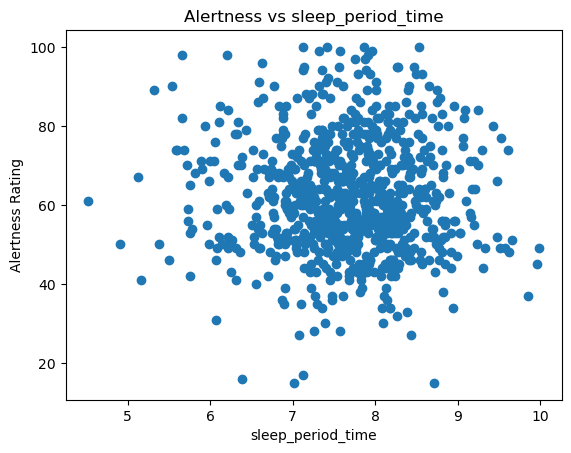

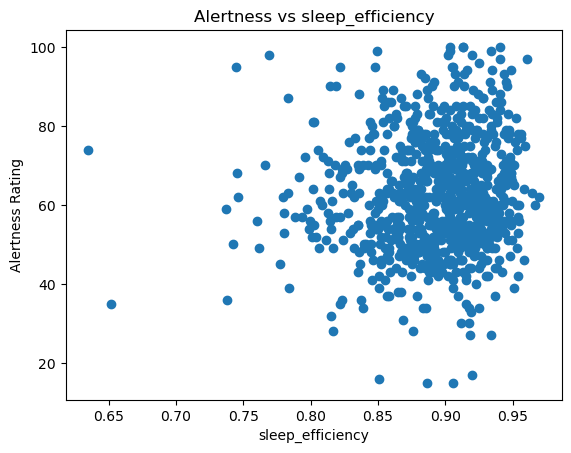

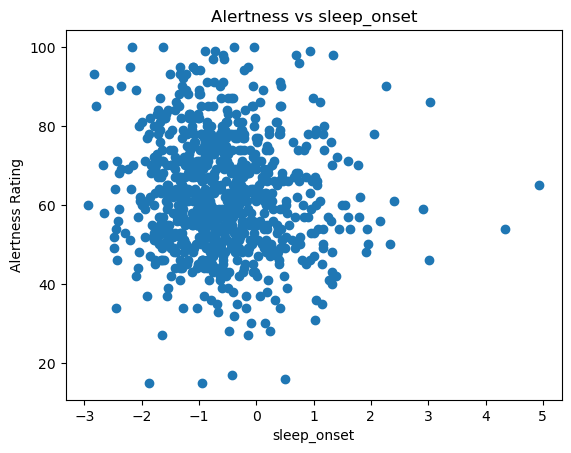

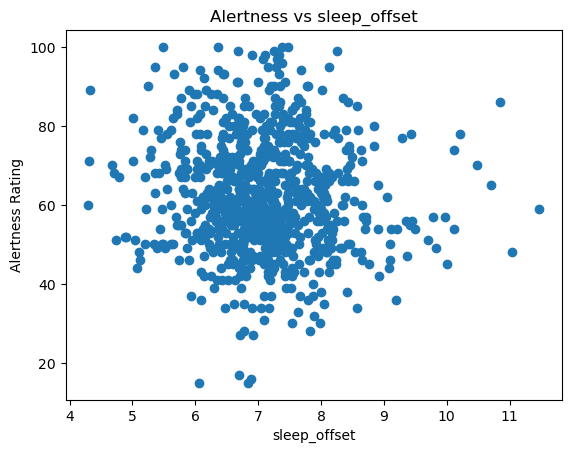

In [187]:
import matplotlib.pyplot as plt

sleep_params = ['sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset']

for param in sleep_params:
    plt.scatter(merged_df[param], merged_df['alertness_rating'])
    plt.xlabel(param)
    plt.ylabel('Alertness Rating')
    plt.title(f'Alertness vs {param}')
    plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# sleep_params = ['sleep_period_time', 'sleep_efficiency', 'sleep_onset', 'sleep_offset']
# output_directory = "../plot_new/scatterplots/"
# import os
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)
# for param in sleep_params:
#     plt.figure() 
#     plt.scatter(merged_df[param], merged_df['alertness_rating'], alpha=0.5)
#     plt.xlabel(param)
#     plt.ylabel('Alertness Rating')
#     plt.title(f'Alertness vs {param}')
#     filename = f"{output_directory}alertness_vs_{param}.png"
#     plt.savefig(filename)
#     plt.close()

#     print(f"Saved scatterplot: {filename}")